## 1. Pré-processamento, análise de dados e limpeza dos dados

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, f1_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,123,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0
1,806,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
2,667,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
3,282,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
4,278,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1


### 1.1. Disposições iniciais (pesquisa sobre os dados)

1. a pressão arterial normal em repouso é geralmente considerada normal abaixo de 120/80 mmHg

2. Os valores ideais de colesterol sérico são: colesterol total abaixo de 200 mg/dL, LDL ("ruim") abaixo de 130 mg/dL (com alvos mais baixos para riscos elevados) e HDL ("bom") acima de 40 mg/dL para homens e 50 mg/dL para mulheres.

3. Os valores normais de glicemia em jejum, para a maioria dos adultos, situam-se entre 70 mg/dL e 99 mg/dL

4. Valores normais de tálio no corpo não são bem definidos, mas em níveis sanguíneos, concentrações superiores a 100 µg/L são consideradas tóxicas, e superiores a 300 µg/L indicam ingestão grave.

5. A frequência cardíaca máxima (FCM) normal pode ser estimada pela fórmula 220 menos a idade da pessoa. 

6. O segmento ST é uma parte do padrão de onda do ECG que representa o período em que os ventrículos do coração estão eletricamente neutros após a despolarização e antes da repolarização. 

### 1.2. Legenda para os dados

id — identificador único para cada registro de paciente.

age — idade do paciente em anos.

sex — sexo do paciente (0 = feminino, 1 = masculino).

cp — tipo de dor no peito (categórica: 0–3).

trestbps — pressão arterial em repouso (mm Hg).

chol — colesterol sérico (mg/dl).

fbs — glicemia de jejum > 120 mg/dl (1 = verdadeiro, 0 = falso).

restecg — resultados do eletrocardiograma em repouso (0–2).

thalach — frequência cardíaca máxima atingida.

exang — angina induzida por exercício (1 = sim, 0 = não).

oldpeak — depressão do segmento ST induzida por exercício em relação ao repouso.

slope — inclinação do segmento ST durante o esforço (0–2).

ca — número de vasos principais coloridos por fluoroscopia (0–3).

thal — resultado do exame de tálio (3 = normal, 6 = defeito fixo, 7 = defeito reversível).

target — variável alvo (0 = sem doença cardíaca, 1 = com doença cardíaca).

### 1.3. Limpeza dos dados

In [3]:
df[df.isna()].value_counts()

Series([], Name: count, dtype: int64)

Não há valores null ou NaN.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        717 non-null    int64  
 1   age       717 non-null    int64  
 2   sex       717 non-null    int64  
 3   cp        717 non-null    int64  
 4   trestbps  717 non-null    int64  
 5   chol      717 non-null    int64  
 6   fbs       717 non-null    int64  
 7   restecg   717 non-null    int64  
 8   thalach   717 non-null    int64  
 9   exang     717 non-null    int64  
 10  oldpeak   717 non-null    float64
 11  slope     717 non-null    int64  
 12  ca        717 non-null    int64  
 13  thal      717 non-null    int64  
 14  target    717 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 84.2 KB


Todas as colunas já estão com o tipo de dado adequado.

In [5]:
df[df['thal'] == 7] | df[df['thal'] == 6]

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [6]:
df[df['thal'] != 3]

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,667,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
3,282,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
4,278,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
6,624,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
7,600,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,736,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
712,485,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
713,460,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
714,15,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


Como não há na tabela nenhum tipo de dado com tálio = 6 ou tálio = 7, e vários valores diferentes de 3, desconsiderei esse dado.

In [7]:
df[df.duplicated()]

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Não há nenhuma linha duplicada.

### 1.4. Estatísticas descritivas

In [8]:
df.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,512.239888,54.553696,0.686192,0.910739,132.570432,247.794979,0.142259,0.511855,148.796374,0.330544,1.047559,1.394700,0.746165,2.333333,0.513250
std,297.281629,9.101168,0.464363,1.022298,17.864781,50.842990,0.349560,0.522068,23.055019,0.470737,1.178620,0.629023,1.020599,0.606452,0.500173
min,1.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,255.000000,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,515.000000,56.000000,1.000000,1.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,777.000000,61.000000,1.000000,2.000000,140.000000,282.000000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,1024.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
women = df[df['sex'] == 0]
men = df[df['sex'] == 1]

# quantos são mulheres?
perc = len(women)/(len(women) + len(men))
print(perc * 100)

# quantos tem mais de 40 anos?
over_40 = df[df['age'] >= 40]
perc_over_40 = len(over_40)/len(df['age'])
print(perc_over_40 * 100)

# quantos têm doenças cardíacas?
cardiac = df[df['target'] == 1]
perc_cardiac = len(cardiac)/len(df['target'])
print(perc_cardiac * 100)

31.380753138075313
94.42119944211994
51.324965132496516


In [10]:
# estatísticas descritivas para apenas pessoas que têm doença cardíaca

cardiac.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.00000,368.000000,368.000000,368.000000,368.000000,368.000000,368.0
mean,506.217391,52.312500,0.576087,1.383152,130.119565,240.945652,0.122283,0.581522,158.56250,0.108696,0.544022,1.603261,0.383152,2.119565,1.0
std,292.773511,9.854951,0.494850,0.952518,16.584746,50.518319,0.328058,0.504893,19.03865,0.311681,0.761983,0.599900,0.890421,0.451275,0.0
min,6.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,257.750000,44.000000,0.000000,1.000000,120.000000,209.000000,0.000000,0.000000,148.00000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,502.000000,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.00000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,756.000000,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.00000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,1024.000000,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.00000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [11]:
# quantos dos pacientes com doença cardíaca tem dor no peito >= 1?

print(len(cardiac[cardiac['cp'] >= 1])/len(cardiac['cp']) * 100)

# quantos dos pacientes com doença cardíaca tem colesterol maior que 200?

print(len(cardiac[cardiac['chol'] > 200])/len(cardiac['chol']) * 100)

# quantos dos pacientes com doença cardíaca tem pressão arterial em repouso > 120?

print(len(cardiac[cardiac['trestbps'] > 120])/len(cardiac['trestbps']) * 100)

# quantos dos pacientes com doença cardíaca tem glicemia de jejum < 120 mg/dl?

print(len(cardiac[cardiac['fbs'] == 0])/len(cardiac['fbs']) * 100)

# quantos dos pacientes com doença cardíaca não tem angina induzida por exercício?

print(len(cardiac[cardiac['exang'] == 0])/len(cardiac['exang']) * 100)

# quantos dos pacientes com doença cardíaca tem resultados do eletrocardiograma em repouso != 0?

print(len(cardiac[cardiac['restecg'] != 0])/len(cardiac['restecg']) * 100)

# quantos dos pacientes com doença cardíaca tem número de vasos principais coloridos por fluoroscopia != 0?

print(len(cardiac[cardiac['ca'] != 0])/len(cardiac['ca']) * 100)

# quantos dos pacientes com doença cardíaca tem inclinação do segmento ST durante o esforço != 0?

print(len(cardiac[cardiac['slope'] != 0])/len(cardiac['slope']) * 100)

# quantos dos pacientes com doença cardíaca tem oldpeak > 0.5?

print(len(cardiac[cardiac['oldpeak'] > 0.5])/len(cardiac['oldpeak']) * 100)

# quantos dos pacientes com doença cardíaca tem > 40 anos?

print(len(cardiac[cardiac['age'] > 40])/len(cardiac['age']) * 100)

#  quantos dos pacientes com doença cardíaca tem frequencia cardiaca maior que 160?

print(len(cardiac[cardiac['thalach'] > 160])/len(cardiac['thalach']) * 100)

# quantos dos pacientes com doença cardíaca são mulheres?

print(len(cardiac[cardiac['sex'] == 0])/len(cardiac['sex']) * 100)

77.17391304347827
80.97826086956522
63.858695652173914
87.77173913043478
89.13043478260869
57.608695652173914
21.73913043478261
94.02173913043478
35.869565217391305
91.03260869565217
50.815217391304344
42.391304347826086


A partir dos números acima, o colesterol alto, a glicemia em jejum baixa, a falta de angina induzida, a inclinação diferente de 0 e a idade parecem ser os fatores em comum mais significativos das pessoas que possuem doenças cardíacas.

### 1.5. Gráficos das estatísticas

#### 1.5.1. Colesterol

In [12]:
# pesssoas sem doenças cardíacas
healthy = df[df['target'] == 0]

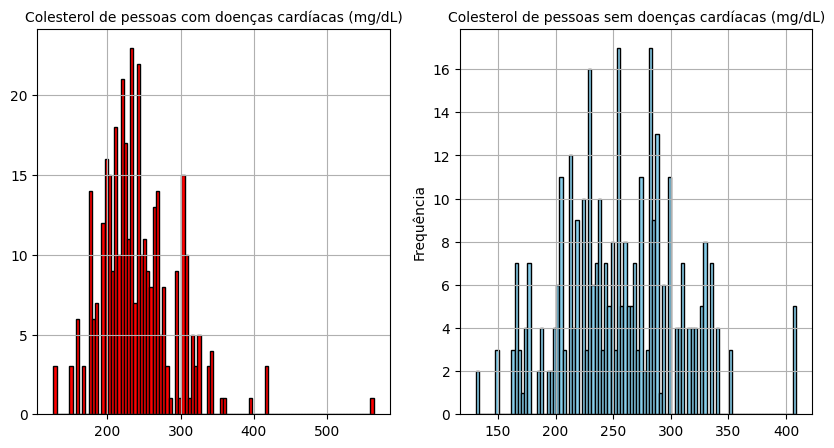

In [13]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(cardiac['chol'], bins=100, color='red', edgecolor='black')
ax1.set_title('Colesterol de pessoas com doenças cardíacas (mg/dL)', fontsize=10)
ax2.hist(healthy['chol'], bins=100, color='skyblue', edgecolor='black')
ax2.set_title('Colesterol de pessoas sem doenças cardíacas (mg/dL)', fontsize=10)
plt.ylabel('Frequência')
ax1.grid(True)
ax2.grid(True)
plt.show()

É possível ver que as diferenças dos valores máximos e das modas dos valores são consideráveis e pessoas com doenças tem colesterol significantemente mais alto:

In [14]:
# valor mais comum dos cardíacos
print(cardiac['chol'].mode())
# valor mais comum dos saudáveis
print(healthy['chol'].mode())
# diferença entre os máximos
print(cardiac['chol'].max() - healthy['chol'].max())

0    240
Name: chol, dtype: int64
0    212
Name: chol, dtype: int64
155


#### 1.5.2. Pressão arterial

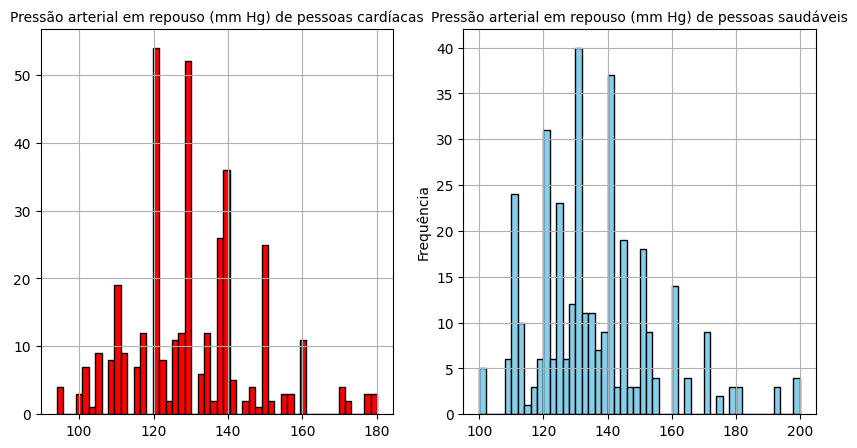

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(cardiac['trestbps'], bins=50, color='red', edgecolor='black')
ax1.set_title('Pressão arterial em repouso (mm Hg) de pessoas cardíacas', fontsize=10)
ax2.hist(healthy['trestbps'], bins=50, color='skyblue', edgecolor='black')
ax2.set_title('Pressão arterial em repouso (mm Hg) de pessoas saudáveis', fontsize=10)
plt.ylabel('Frequência')
ax1.grid(True)
ax2.grid(True)
plt.show()

Abaixo, pode-se notar que essa variável não faz tanta diferença entre cardíacos e saudáveis:

In [16]:
# valor mais comum dos cardíacos
print(cardiac['trestbps'].mode())
# valor mais comum dos saudáveis
print(healthy['trestbps'].mode())
# diferença entre os máximos
print(cardiac['trestbps'].max() - healthy['trestbps'].max())

0    120
Name: trestbps, dtype: int64
0    130
Name: trestbps, dtype: int64
-20


#### 1.5.3. Frequência Cardíaca Máxima Medida

Os gráficos abaixo mostram que há medidas mais elevadas para pessoas cardíacas.

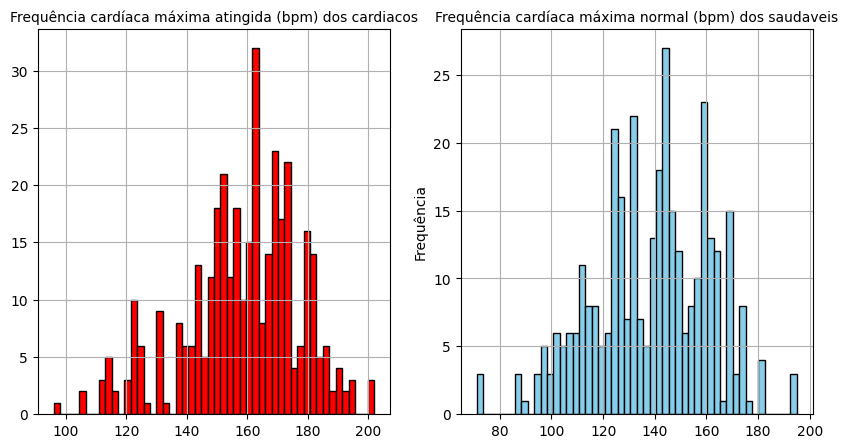

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(cardiac['thalach'], bins=50, color='red', edgecolor='black')
ax1.set_title('Frequência cardíaca máxima atingida (bpm) dos cardiacos', fontsize=10)
ax2.hist(healthy['thalach'], bins=50, color='skyblue', edgecolor='black')
ax2.set_title('Frequência cardíaca máxima normal (bpm) dos saudaveis', fontsize=10)

plt.ylabel('Frequência')
ax1.grid(True)
ax2.grid(True)
plt.show()

In [18]:
# em comparação com os cardíacos (50%), apenas 17% dos saudáveis tem frequência máxima maior que 160.

len(healthy[healthy['thalach'] > 160])/len(healthy['thalach']) * 100

17.191977077363894

Os gráficos mostram que a thalach dos cardíacos é significantemente mais alta.

In [19]:
# valor mais comum dos cardíacos
print(cardiac['thalach'].mode())
# valor mais comum dos saudáveis
print(healthy['thalach'].mode())
# diferença entre os máximos
print(cardiac['thalach'].max() - healthy['thalach'].max())

0    162
Name: thalach, dtype: int64
0    125
1    132
Name: thalach, dtype: int64
7


#### 1.5.4. Número de vasos principais coloridos por fluoroscopia

Esse gráfico mostra que a maioria dos pacientes com doenças cardíacas não apresentam vasos principais coloridos.

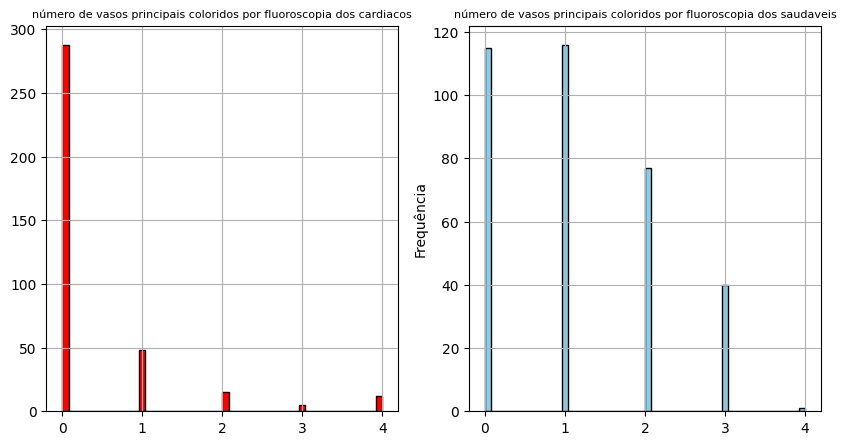

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(cardiac['ca'], bins=50, color='red', edgecolor='black')
ax1.set_title('número de vasos principais coloridos por fluoroscopia dos cardiacos', fontsize=8)
ax2.hist(healthy['ca'], bins=50, color='skyblue', edgecolor='black')
ax2.set_title('número de vasos principais coloridos por fluoroscopia dos saudaveis', fontsize=8)

plt.ylabel('Frequência')
ax1.grid(True)
ax2.grid(True)
plt.show()

#### 1.5.5. Depressão do segmento ST

No gráfico abaixo, fica claro que pessoas com doenças cardiacas tem menores depressões do segmento ST induzidas.

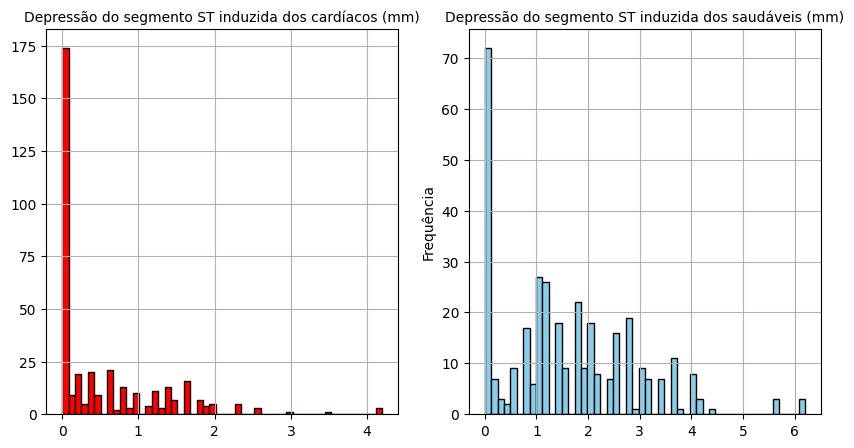

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(cardiac['oldpeak'], bins=50, color='red', edgecolor='black')
ax1.set_title('Depressão do segmento ST induzida dos cardíacos (mm)', fontsize=10)
ax2.hist(healthy['oldpeak'], bins=50, color='skyblue', edgecolor='black')
ax2.set_title('Depressão do segmento ST induzida dos saudáveis (mm)', fontsize=10)

plt.ylabel('Frequência')
ax1.grid(True)
ax2.grid(True)
plt.show()

#### 1.5.6. Inclinação do segmento ST durante o esforço

O gráfico abaixo mostra que pacientes com doenças tem maior inclinação do segmento ST.

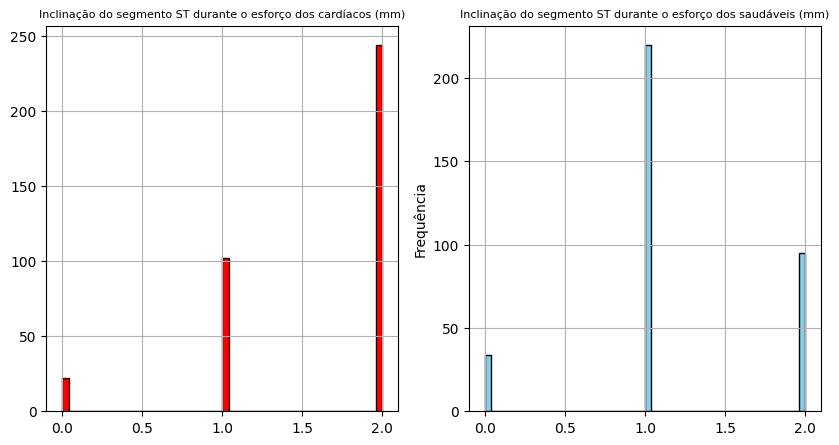

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(cardiac['slope'], bins=50, color='red', edgecolor='black')
ax1.set_title('Inclinação do segmento ST durante o esforço dos cardíacos (mm)', fontsize=8)
ax2.hist(healthy['slope'], bins=50, color='skyblue', edgecolor='black')
ax2.set_title('Inclinação do segmento ST durante o esforço dos saudáveis (mm)', fontsize=8)

plt.ylabel('Frequência')
ax1.grid(True)
ax2.grid(True)
plt.show()

#### 1.5.7. Glicemia de jejum

O gráfico abaixo mostra que não há uma diferença muito significativa entre os cardíacos e os saudáveis nessa variável.

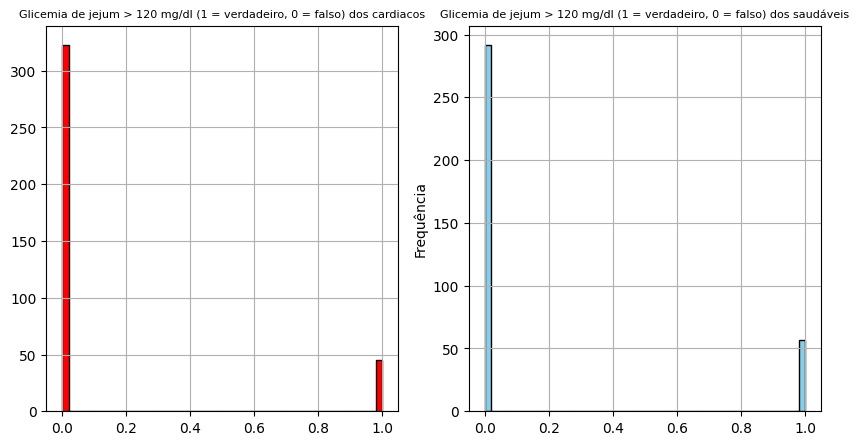

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(cardiac['fbs'], bins=50, color='red', edgecolor='black')
ax1.set_title('Glicemia de jejum > 120 mg/dl (1 = verdadeiro, 0 = falso) dos cardiacos', fontsize=8)
ax2.hist(healthy['fbs'], bins=50, color='skyblue', edgecolor='black')
ax2.set_title('Glicemia de jejum > 120 mg/dl (1 = verdadeiro, 0 = falso) dos saudáveis', fontsize=8)

plt.ylabel('Frequência')
ax1.grid(True)
ax2.grid(True)
plt.show()

#### 1.5.8. Idade

Os gráficos abaixo mostram que essa variável pode não ser tão significativa.

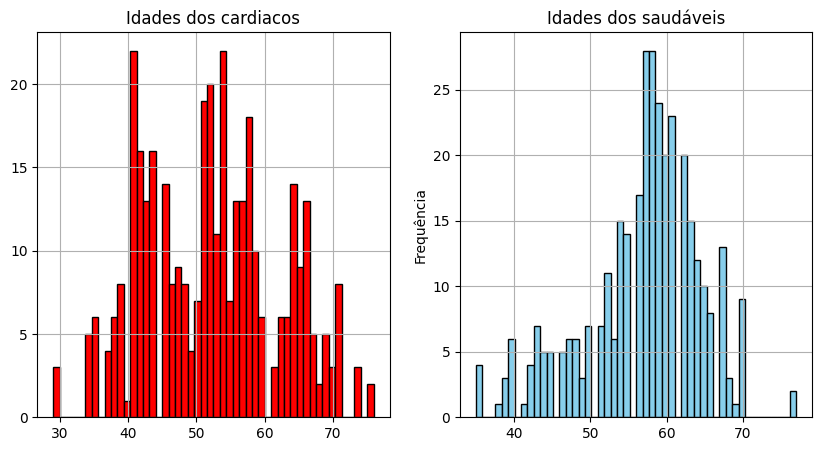

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(cardiac['age'], bins=50, color='red', edgecolor='black')
ax1.set_title('Idades dos cardiacos')
ax2.hist(healthy['age'], bins=50, color='skyblue', edgecolor='black')
ax2.set_title('Idades dos saudáveis')

plt.ylabel('Frequência')
ax1.grid(True)
ax2.grid(True)
plt.show()

#### 1.5.9. Sexo

Há mais homens nas duas amostras, então essa pode não ser uma variável muito significativa.

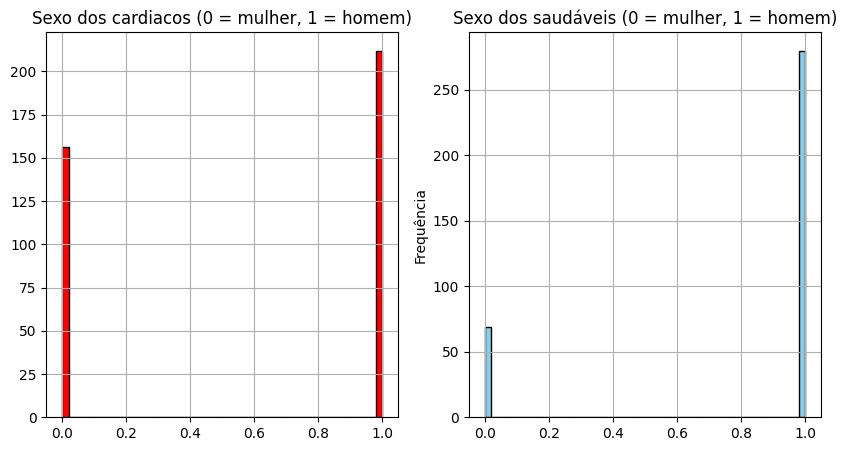

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(cardiac['sex'], bins=50, color='red', edgecolor='black')
ax1.set_title('Sexo dos cardiacos (0 = mulher, 1 = homem)')
ax2.hist(healthy['sex'], bins=50, color='skyblue', edgecolor='black')
ax2.set_title('Sexo dos saudáveis (0 = mulher, 1 = homem)')

plt.ylabel('Frequência')
ax1.grid(True)
ax2.grid(True)
plt.show()

## 1.6. Hipóteses

### 1.6.1. Pessoas com problemas cardíacos tem menores depressões do segmento ST, mas maiores inclinações.

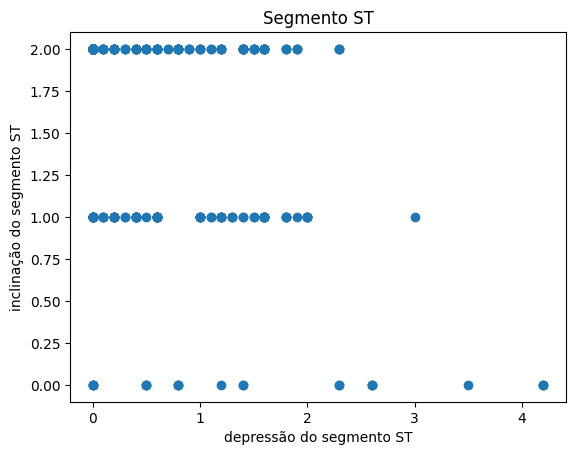

In [26]:
plt.scatter(cardiac['oldpeak'], cardiac['slope'])
plt.title("Segmento ST")
plt.xlabel("depressão do segmento ST")
plt.ylabel("inclinação do segmento ST")
plt.show()

### 1.6.2. Pessoas com maior dor no peito tem maior frequência máxima medida.

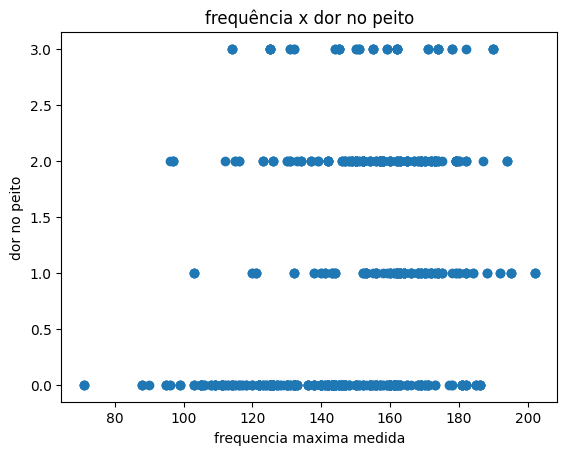

In [27]:
# para todos os pacientes
plt.scatter(df['thalach'], df['cp'])
plt.title("frequência x dor no peito")
plt.xlabel("frequencia maxima medida")
plt.ylabel("dor no peito")
plt.show()

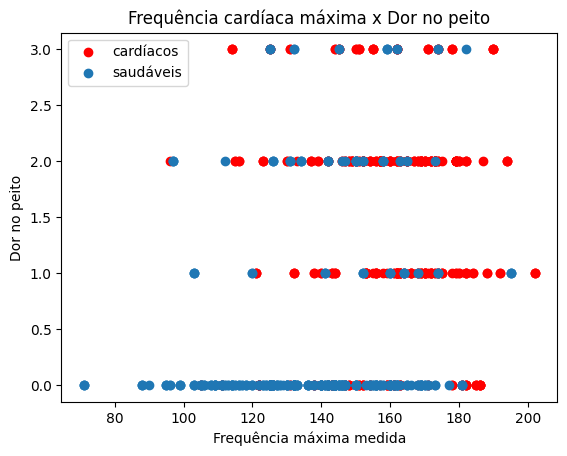

In [28]:
plt.scatter(cardiac['thalach'], cardiac['cp'], color='red', label='cardíacos')
plt.scatter(healthy['thalach'], healthy['cp'], label='saudáveis')

plt.title("Frequência cardíaca máxima x Dor no peito")
plt.xlabel("Frequência máxima medida")
plt.ylabel("Dor no peito")
plt.legend()  # adiciona legenda para diferenciar as cores
plt.show()

In [29]:
# médias e modas das pessoas com dor no peito = 1
print('dor no peito = 1:')
print('cardíacos (média):', cardiac[cardiac['cp'] == 1]['thalach'].mean())
print('cardíacos (moda):', np.array(cardiac[cardiac['cp'] == 1]['thalach'].mode()))
print('saudáveis (média):', healthy[healthy['cp'] == 1]['thalach'].mean())
print('saudáveis (moda):', np.array(healthy[healthy['cp'] == 1]['thalach'].mode()))
print("-------------")

# médias e moda das pessoas com dor no peito = 2
print('dor no peito = 2:')
print('cardíacos (média):', cardiac[cardiac['cp'] == 2]['thalach'].mean())
print('cardíacos (moda):', np.array(cardiac[cardiac['cp'] == 2]['thalach'].mode()))
print('saudáveis (média):', healthy[healthy['cp'] == 2]['thalach'].mean())
print('saudáveis (moda):', np.array(healthy[healthy['cp'] == 2]['thalach'].mode()))
print("-------------")

# médias das pessoas com dor no peito = 3
print('dor no peito = 3:')
print('cardíacos (média):', cardiac[cardiac['cp'] == 3]['thalach'].mean())
print('cardíacos (moda):', np.array(cardiac[cardiac['cp'] == 3]['thalach'].mode()))
print('saudáveis (média):', healthy[healthy['cp'] == 3]['thalach'].mean())
print('saudáveis (moda):', np.array(healthy[healthy['cp'] == 3]['thalach'].mode()))

dor no peito = 1:
cardíacos (média): 164.0612244897959
cardíacos (moda): [162]
saudáveis (média): 154.33333333333334
saudáveis (moda): [160 164]
-------------
dor no peito = 2:
cardíacos (média): 159.63945578231292
cardíacos (moda): [152 173]
saudáveis (média): 142.0
saudáveis (moda): [150]
-------------
dor no peito = 3:
cardíacos (média): 155.17948717948718
cardíacos (moda): [155 162 190]
saudáveis (média): 150.66666666666666
saudáveis (moda): [125 159]


## 2. Modelo preditivo

### 2.1. Random Forest (1)

In [30]:
X = df.drop('target', axis=1)
y = df['target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# cria um modelo random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# faz um fit do modelo com os dados de treino
rf_model.fit(X_train, y_train)

# predições do modelo
y_pred = rf_model.predict(X_test)


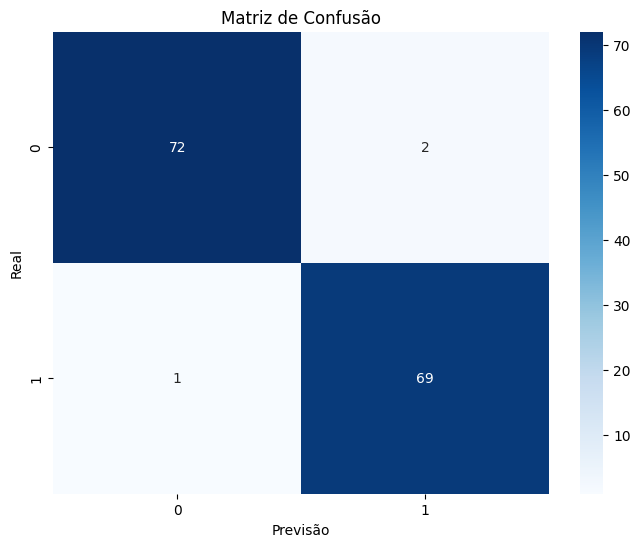

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Previsão')
plt.show()

In [33]:
# Avalia o modelo
tree_accuracy = accuracy_score(y_test, y_pred)
tree_precision = precision_score(y_test, y_pred)  
tree_recall = recall_score(y_test, y_pred)
tree_f1 = f1_score(y_test, y_pred)
print(f'Acurácia: {tree_accuracy:.2f}')
print(f'Precisão: {tree_precision:.2f}')
print(f'Revocação (Recall): {tree_recall:.2f}')
print(f'f1-score: {tree_f1:.2f}')
# relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.98
Precisão: 0.97
Revocação (Recall): 0.99
f1-score: 0.98

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        74
           1       0.97      0.99      0.98        70

    accuracy                           0.98       144
   macro avg       0.98      0.98      0.98       144
weighted avg       0.98      0.98      0.98       144



O modelo construído inicialmente parece muito bom, mas veremos abaixo como ele performa com novos dados (os de teste):

In [34]:
df_test = pd.read_csv('test_public.csv')

In [35]:
X_test_2 = df_test.copy()

y_pred_2 = rf_model.predict(X_test_2)

In [36]:
df_resultados = pd.DataFrame({
    "id": df_test["id"],
    "target": y_pred_2
})

# salva em CSV
df_resultados.to_csv("previsoes.csv", index=False)

Os resultados desse modelo foram muito bons e ficou com um score de 0.98214!

In [37]:
filename = 'finalized_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [38]:
"""
param_grid = {'n_estimators': np.linspace(50, 500, 100).astype(int), 'criterion': ['gini', 'entropy']} 
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
"""

"\nparam_grid = {'n_estimators': np.linspace(50, 500, 100).astype(int), 'criterion': ['gini', 'entropy']} \ngrid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=3)\ngrid.fit(X_train, y_train)\nprint(grid.best_params_)\nprint(grid.best_estimator_)\n"

🔹 Melhor threshold: 0.49
🔹 F1-score no melhor threshold: 0.9859


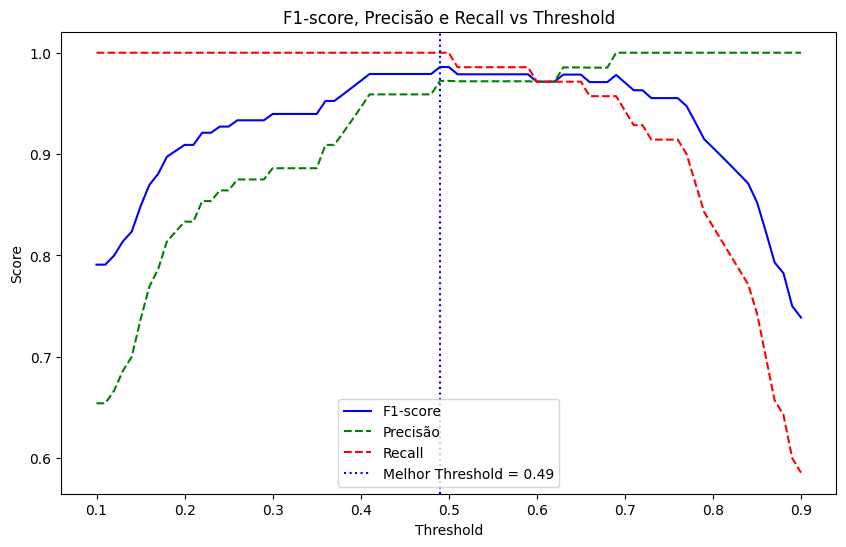

In [39]:
y_probs = rf_model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.91, 0.01)
f1_scores = []
precisions = []
recalls = []

for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))

best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"🔹 Melhor threshold: {best_thresh:.2f}")
print(f"🔹 F1-score no melhor threshold: {best_f1:.4f}")

# Plotando as curvas
plt.figure(figsize=(10,6))
plt.plot(thresholds, f1_scores, label="F1-score", color="blue")
plt.plot(thresholds, precisions, label="Precisão", color="green", linestyle="--")
plt.plot(thresholds, recalls, label="Recall", color="red", linestyle="--")
plt.axvline(best_thresh, color="blue", linestyle=":", label=f"Melhor Threshold = {best_thresh:.2f}")
plt.title("F1-score, Precisão e Recall vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()


### 2.2. Regressão logística

In [40]:
rl_model = LogisticRegression(max_iter=1000)
rl_model.fit(X_train, y_train)

c:\Users\Inteli\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [41]:
y_pred = rl_model.predict(X_test)

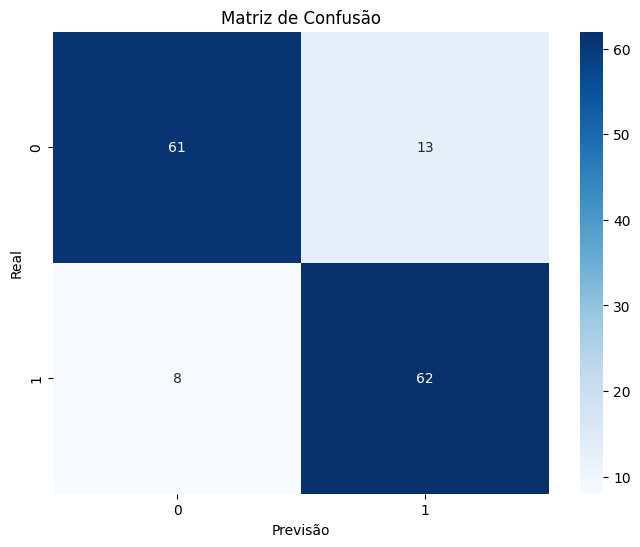

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Previsão')
plt.show()

In [43]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {acc:.2f}")
print(f"Precisão: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

# relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.85
Precisão: 0.83
Recall: 0.89
F1-score: 0.86

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        74
           1       0.83      0.89      0.86        70

    accuracy                           0.85       144
   macro avg       0.86      0.86      0.85       144
weighted avg       0.86      0.85      0.85       144



In [44]:
y_pred_3 = rl_model.predict(X_test_2)

In [45]:
df_resultados = pd.DataFrame({
    "id": df_test["id"],
    "target": y_pred_3
})

# salva em CSV
df_resultados.to_csv("previsoes3.csv", index=False)

Os resultados desse modelo não foram tão bons quanto o primeiro e ficou com um score de 0.84297

### 2.3. Decision Tree Classifier

In [46]:
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=5,
    random_state=42
)

In [47]:
# treina o modelo
dt_model.fit(X_train, y_train)

# previsões
y_pred = dt_model.predict(X_test)

# métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {acc:.2f}")
print(f"Precisão: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

# relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.94
Precisão: 0.92
Recall: 0.96
F1-score: 0.94

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        74
           1       0.92      0.96      0.94        70

    accuracy                           0.94       144
   macro avg       0.94      0.94      0.94       144
weighted avg       0.94      0.94      0.94       144



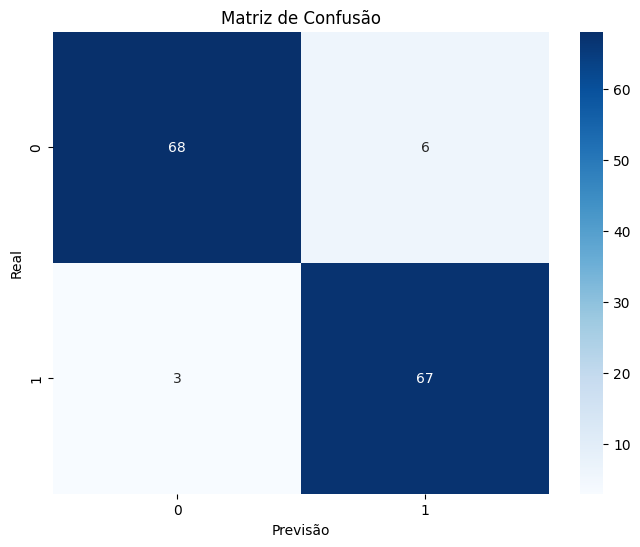

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Previsão')
plt.show()

In [49]:
y_pred_4 = dt_model.predict(X_test_2)

In [50]:
df_resultados = pd.DataFrame({
    "id": df_test["id"],
    "target": y_pred_4
})

# salva em CSV
df_resultados.to_csv("previsoes4.csv", index=False)

### 2.4. Support Vector Machine (SVM)

In [51]:
svm_model = SVC(
    kernel='rbf',
    probability=True,
    C=1.0,
    gamma='scale',
    random_state=42
)

svm_model.fit(X_train, y_train)

# previsões
y_pred = svm_model.predict(X_test)

# métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {acc:.2f}")
print(f"Precisão: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")


# relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.59
Precisão: 0.56
Recall: 0.79
F1-score: 0.65

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.41      0.50        74
           1       0.56      0.79      0.65        70

    accuracy                           0.59       144
   macro avg       0.61      0.60      0.58       144
weighted avg       0.61      0.59      0.58       144



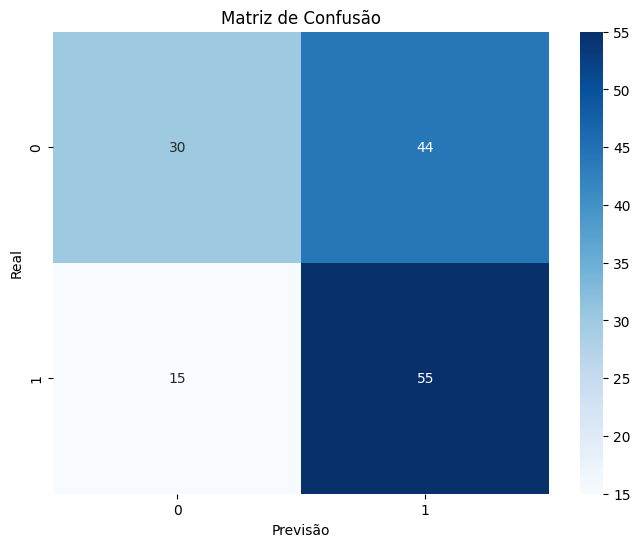

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Previsão')
plt.show()

### 2.5. K-Nearest Neighbors (KNN)

In [53]:
knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(
        n_neighbors=5,   # número de vizinhos
        weights='uniform', # 'uniform' ou 'distance'
        metric='minkowski' # distância euclidiana por padrão
    )
)

# treina o modelo
knn_model.fit(X_train, y_train)

# previsões
y_pred = knn_model.predict(X_test)

# métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {acc:.2f}")
print(f"Precisão: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

# relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.89
Precisão: 0.85
Recall: 0.94
F1-score: 0.89

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        74
           1       0.85      0.94      0.89        70

    accuracy                           0.89       144
   macro avg       0.89      0.89      0.89       144
weighted avg       0.89      0.89      0.89       144



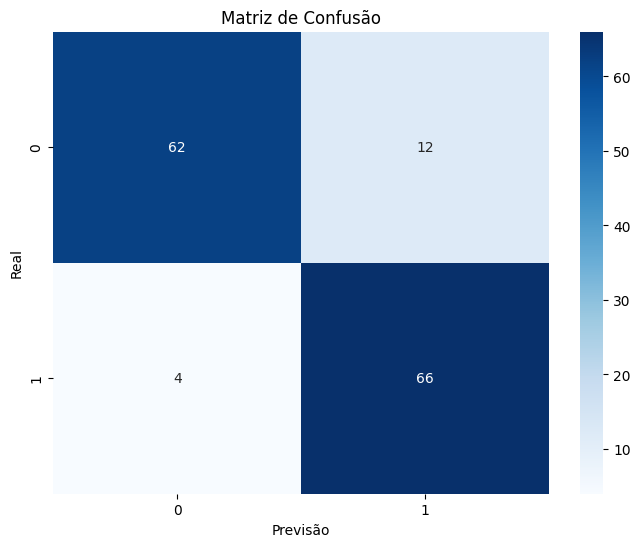

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Previsão')
plt.show()

In [55]:
y_pred_5 = knn_model.predict(X_test_2)

In [56]:
df_resultados = pd.DataFrame({
    "id": df_test["id"],
    "target": y_pred_5
})

# salva em CSV
df_resultados.to_csv("previsoes5.csv", index=False)

### 2.6 GradientBoostingClassifier

In [57]:
gb_model = GradientBoostingClassifier(
    n_estimators=368,
    loss='log_loss',
    criterion='squared_error',
    random_state=42
)

# treina o modelo
gb_model.fit(X_train, y_train)

# previsões
y_pred = gb_model.predict(X_test)

# métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {acc:.2f}")
print(f"Precisão: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")


# relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.97
Precisão: 0.97
Recall: 0.97
F1-score: 0.97

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        74
           1       0.97      0.97      0.97        70

    accuracy                           0.97       144
   macro avg       0.97      0.97      0.97       144
weighted avg       0.97      0.97      0.97       144



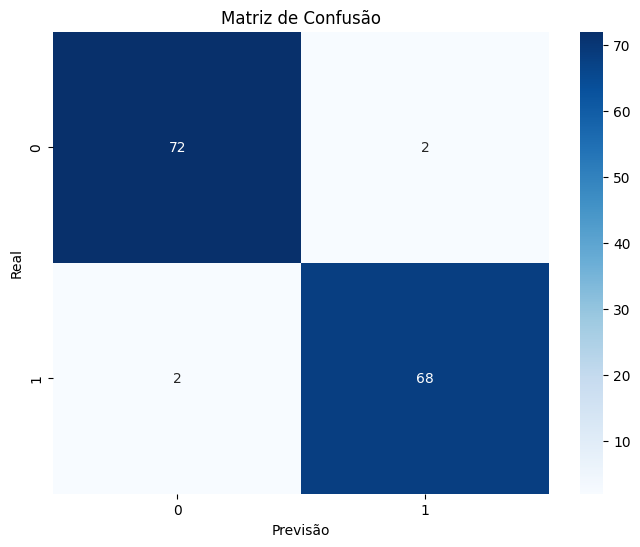

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Previsão')
plt.show()

In [59]:
"""
param_grid = {'n_estimators': np.linspace(50, 500, 100).astype(int), 'criterion': ['friedman_mse', 'squared_error'], 'loss': ['log_loss', 'exponential']}
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
"""

"\nparam_grid = {'n_estimators': np.linspace(50, 500, 100).astype(int), 'criterion': ['friedman_mse', 'squared_error'], 'loss': ['log_loss', 'exponential']}\ngrid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, verbose=3)\ngrid.fit(X_train, y_train)\nprint(grid.best_params_)\nprint(grid.best_estimator_)\n"

In [60]:
y_pred_6 = gb_model.predict(X_test_2)

In [61]:
df_resultados = pd.DataFrame({
    "id": df_test["id"],
    "target": y_pred_6
})

# salva em CSV
df_resultados.to_csv("previsoes6.csv", index=False)

### 2.7. XGBoost

In [62]:
# cria o modelo XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,      # número de árvores
    max_depth=4,           # profundidade máxima
    learning_rate=0.1,     # taxa de aprendizado
    subsample=0.8,         # fração de amostras para cada árvore
    colsample_bytree=0.8,  # fração de features usadas em cada árvore
    eval_metric='logloss', # métrica de avaliação interna
    use_label_encoder=False,
    random_state=42
)

# treina o modelo
xgb_model.fit(X_train, y_train)

# previsões
y_pred = xgb_model.predict(X_test)

# métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {acc:.2f}")
print(f"Precisão: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

# relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.97
Precisão: 0.95
Recall: 0.99
F1-score: 0.97

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        74
           1       0.95      0.99      0.97        70

    accuracy                           0.97       144
   macro avg       0.97      0.97      0.97       144
weighted avg       0.97      0.97      0.97       144



c:\Users\Inteli\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:14:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


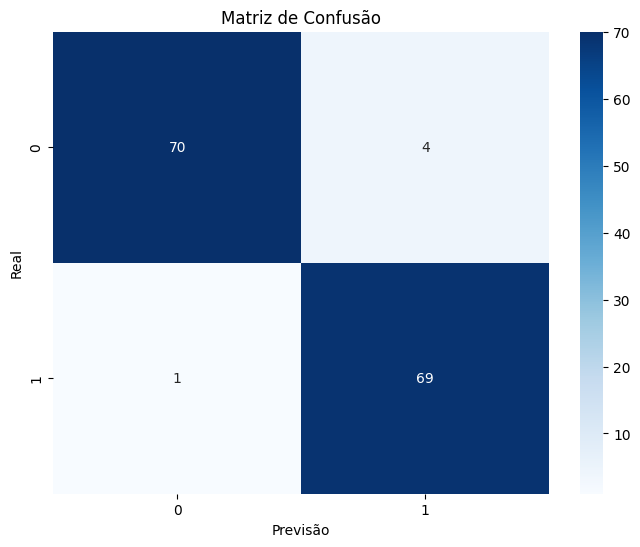

In [63]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Previsão')
plt.show()

In [64]:
y_pred_7 = xgb_model.predict(X_test_2)

In [65]:
df_resultados = pd.DataFrame({
    "id": df_test["id"],
    "target": y_pred_7
})

# salva em CSV
df_resultados.to_csv("previsoes7.csv", index=False)

### 2.8. MLPClassifier

In [66]:
mlp_model = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        hidden_layer_sizes=(50, 25),  # 2 camadas ocultas: 50 e 25 neurônios
        activation='relu',            # função de ativação
        solver='adam',                # otimizador
        max_iter=500,                 # número máximo de iterações
        random_state=42
    )
)

# treina o modelo
mlp_model.fit(X_train, y_train)

# previsões
y_pred = mlp_model.predict(X_test)

# métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {acc:.2f}")
print(f"Precisão: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

# relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.95
Precisão: 0.94
Recall: 0.96
F1-score: 0.95

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        74
           1       0.94      0.96      0.95        70

    accuracy                           0.95       144
   macro avg       0.95      0.95      0.95       144
weighted avg       0.95      0.95      0.95       144



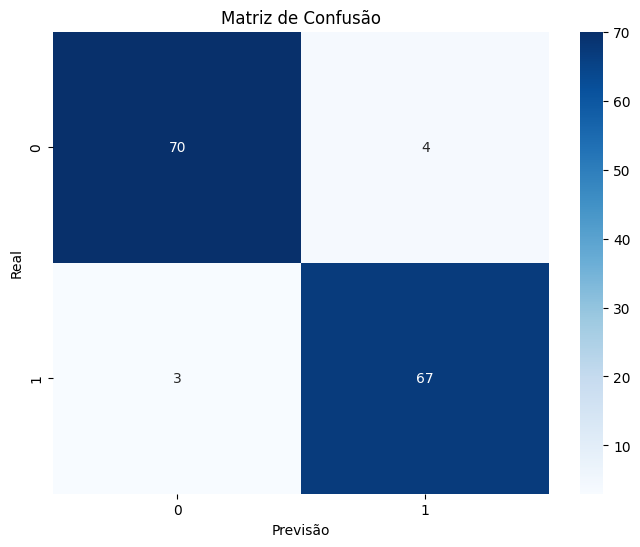

In [67]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Previsão')
plt.show()

In [68]:
y_pred_8 = mlp_model.predict(X_test_2)

In [69]:
df_resultados = pd.DataFrame({
    "id": df_test["id"],
    "target": y_pred_8
})

# salva em CSV
df_resultados.to_csv("previsoes8.csv", index=False)

### 2.9. Blending de modelos

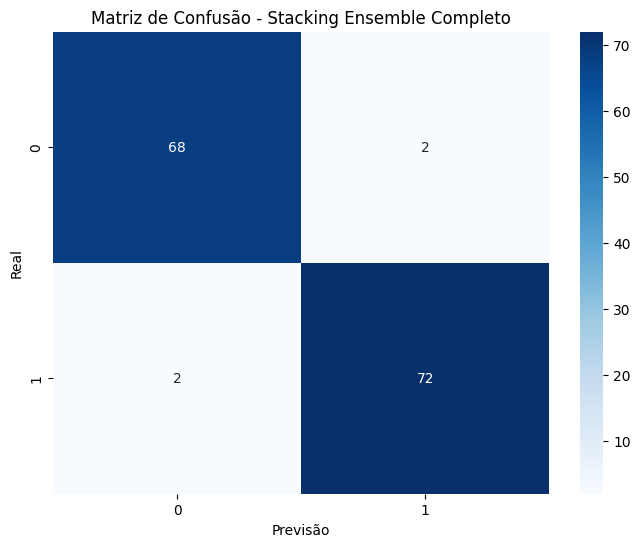


Acurácia: 0.97
Precisão: 0.97
Recall: 0.97
F1-score: 0.97

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        70
           1       0.97      0.97      0.97        74

    accuracy                           0.97       144
   macro avg       0.97      0.97      0.97       144
weighted avg       0.97      0.97      0.97       144



In [70]:
from sklearn.ensemble import StackingClassifier
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

estimators = [
    ("rf", RandomForestClassifier(n_estimators=400, random_state=42)),
    ("gb", GradientBoostingClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, subsample=0.8, random_state=42)),
    ("lr", LogisticRegression(max_iter=1000, random_state=42)),
    ("svm", SVC(kernel="rbf", probability=True, random_state=42)),
    ("knn", KNeighborsClassifier(n_neighbors=5)),
    ("mlp", MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42))
]

# Modelo final (meta-classificador)
stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=5,
    n_jobs=-1
)

stacking.fit(X_train, y_train)


y_pred = stacking.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Stacking Ensemble Completo")
plt.ylabel("Real")
plt.xlabel("Previsão")
plt.show()

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAcurácia: {acc:.2f}")
print(f"Precisão: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


In [71]:
y_pred_9 = stacking.predict(X_test_2)
df_resultados = pd.DataFrame({
    "id": df_test["id"],
    "target": y_pred_9
})

# salva em CSV
df_resultados.to_csv("previsoes11.csv", index=False)

### 2.10. Outro modelo random forest


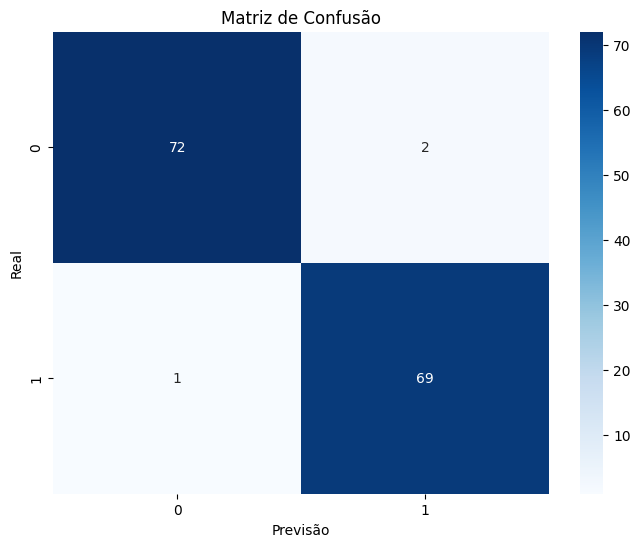

Acurácia: 0.98
Precisão: 0.97
Revocação (Recall): 0.99
f1-score: 0.98

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        74
           1       0.97      0.99      0.98        70

    accuracy                           0.98       144
   macro avg       0.98      0.98      0.98       144
weighted avg       0.98      0.98      0.98       144



In [72]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# cria um modelo random forest
rf2_model = RandomForestClassifier(n_estimators=127, random_state=42, criterion='entropy', max_depth=11)

# faz um fit do modelo com os dados de treino
rf2_model.fit(X_train, y_train)

# predições do modelo
y_pred = rf2_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Previsão')
plt.show()

# Avalia o modelo
tree_accuracy = accuracy_score(y_test, y_pred)
tree_precision = precision_score(y_test, y_pred)  
tree_recall = recall_score(y_test, y_pred)
tree_f1 = f1_score(y_test, y_pred)
print(f'Acurácia: {tree_accuracy:.2f}')
print(f'Precisão: {tree_precision:.2f}')
print(f'Revocação (Recall): {tree_recall:.2f}')
print(f'f1-score: {tree_f1:.2f}')
# relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

y_pred_12 = rf2_model.predict(X_test_2)
df_resultados = pd.DataFrame({
    "id": df_test["id"],
    "target": y_pred_12
})

# salva em CSV
df_resultados.to_csv("previsoes12.csv", index=False)


In [73]:
"""
param_grid = {'max_depth': np.linspace(0, 20, 10).astype(int)}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
"""

"\nparam_grid = {'max_depth': np.linspace(0, 20, 10).astype(int)}\ngrid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=3)\ngrid.fit(X_train, y_train)\nprint(grid.best_params_)\nprint(grid.best_estimator_)\n"